<mark> Import needed tools </mark>

In [2]:
#basics needs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#tensorflows functionnality
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
#sklearn functionnality
from sklearn.metrics import confusion_matrix,classification_report

<mark> Loading data </mark>

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

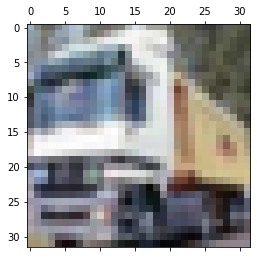

In [6]:
plt.matshow(X_train[1])

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classe_labels=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
classe_labels[y_train[1]]

'truck'

In [11]:
 def show_image(x,y,index):
    plt.figure(figsize=(15,2))
    plt.matshow(X_train[index]) 
    plt.xlabel(classe_labels[y[index]])

<Figure size 1080x144 with 0 Axes>

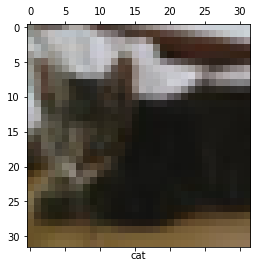

In [12]:
show_image(X_train,y_train,9)

<mark> scale the images </mark>

In [13]:

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [14]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

<mark>Feature engineering</mark>

In [15]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)

In [16]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# <mark> Artificial Neuron Network </mark>

In [17]:
def Artificial_neuron_network():
  model=keras.Sequential([
          keras.layers.Flatten(input_shape=(32,32,3)),
          keras.layers.Dense(3000,activation='relu'),
          keras.layers.Dense(1000,activation='relu'),
          keras.layers.Dense(10,activation='sigmoid')
  ])
  model.compile(
      optimizer='SGD',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  model.summary()
  return model

In [18]:
ANN_model=Artificial_neuron_network()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [19]:
ANN_model.fit(X_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8164 - accuracy: 0.3533
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6265 - accuracy: 0.4249
Epoch 3/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.5424 - accuracy: 0.4563
Epoch 4/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.4832 - accuracy: 0.4776
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4317 - accuracy: 0.4954
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3879 - accuracy: 0.5118
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3490 - accuracy: 0.5255
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3126 - accuracy: 0.5388
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2838 - accuracy: 0.5518
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.252

In [20]:
ANN_model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.6118 - accuracy: 0.4260


[1.6118319034576416, 0.4259999990463257]

In [21]:
y_predicted=ANN_model.predict(X_test_scaled)

In [22]:
y_test[0]

array([3], dtype=uint8)

In [23]:
np.argmax(y_predicted[0])

3

In [24]:
predicted_labels=[np.argmax(elt) for elt in y_predicted]
print("classification report:\n",classification_report(y_test,predicted_labels))

classification report:
               precision    recall  f1-score   support

           0       0.57      0.54      0.55      1000
           1       0.31      0.92      0.46      1000
           2       0.52      0.16      0.25      1000
           3       0.30      0.40      0.34      1000
           4       0.71      0.13      0.22      1000
           5       0.32      0.57      0.41      1000
           6       0.52      0.54      0.53      1000
           7       0.75      0.38      0.50      1000
           8       0.75      0.41      0.53      1000
           9       0.61      0.22      0.32      1000

    accuracy                           0.43     10000
   macro avg       0.54      0.43      0.41     10000
weighted avg       0.54      0.43      0.41     10000



## <mark> Convolution Neuron Network </mark>

In [25]:
def Convolution_neuron_network():
  cnn_model=keras.Sequential([
          #feature extraction parts
          layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
          layers.MaxPooling2D((2,2)),

          layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),
          #classification
          keras.layers.Flatten(),
          keras.layers.Dense(1000,activation='relu'),
          keras.layers.Dense(10,activation='softmax')
  ])
  cnn_model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  cnn_model.summary()
  return cnn_model

In [26]:
cnn_model=Convolution_neuron_network()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)             

In [27]:
cnn_model.fit(X_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 4ms/step - loss: 1.3265 - accuracy: 0.5242
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9554 - accuracy: 0.6663
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7593 - accuracy: 0.7358
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5877 - accuracy: 0.7937
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4224 - accuracy: 0.8537
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2818 - accuracy: 0.9045
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1782 - accuracy: 0.9396
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1295 - accuracy: 0.9559
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0990 - accuracy: 0.9664
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.08

In [28]:
cnn_model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.7279 - accuracy: 0.6952


[1.7278532981872559, 0.6952000260353088]

In [29]:
y_predicted=cnn_model.predict(X_test_scaled)

In [30]:
predicted_labels=[np.argmax(element) for element in y_predicted]
predicted_labels[:5]

[3, 8, 8, 0, 4]

In [32]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [31]:
print("classification report: \n",classification_report(y_test,predicted_labels))

classification report: 
               precision    recall  f1-score   support

           0       0.83      0.64      0.72      1000
           1       0.84      0.80      0.82      1000
           2       0.51      0.69      0.59      1000
           3       0.51      0.51      0.51      1000
           4       0.67      0.65      0.66      1000
           5       0.61      0.57      0.59      1000
           6       0.72      0.79      0.75      1000
           7       0.79      0.73      0.76      1000
           8       0.81      0.80      0.80      1000
           9       0.77      0.78      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

